In [2]:
main_dir = '/Users/matin/Downloads/testProjs/intracellular_M'
import sys
sys.path.insert(0,main_dir)
import numpy as np
import json
import matplotlib.pyplot as plt
import tellurium as te
import os
%load_ext autoreload
%autoreload
%matplotlib inline 
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
%config Completer.use_jedi = False
showOriginalModelString = True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'k_ntrpm_p': 0.06450180507103404, 'n_ntrpm_p': 1.0234990692327557, 'k_ntrpm_t': 0.6100300285761214, 'n_ntrpm_t': 0.061233385292612574, 'k_trpm_s': 0.6100221833038736, 'k_m7ck_t1': 0.7540406314457389, 'k_m7ck_t2': 0.24000573808657966, 'n_m7ck_t': 3.604552468555867, 'k_m7ck_deg': 0.5926330756570221}
t2m: 1 
P1_3 is plotting


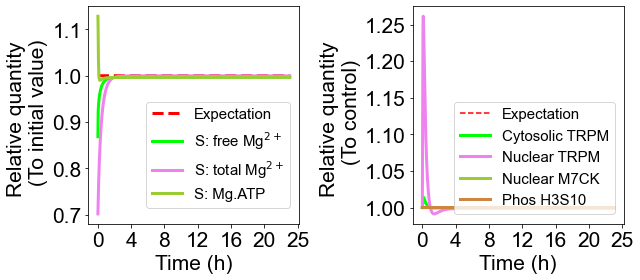

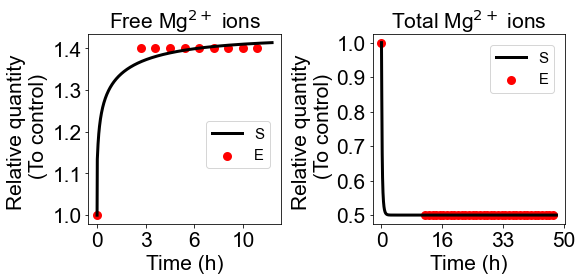

<Figure size 1440x288 with 0 Axes>

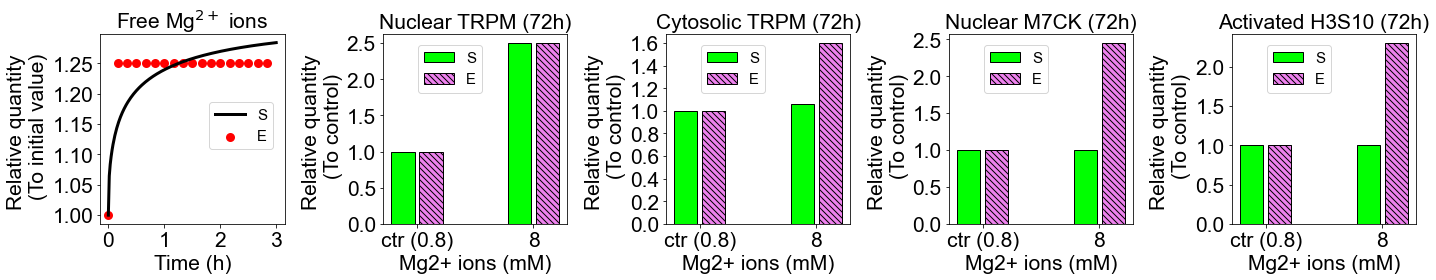

In [3]:
###----sim vs obs-----###
%load_ext autoreload
%autoreload
main_dir = '/Users/matin/Downloads/testProjs/intracellular_M'
import sys
sys.path.insert(0,main_dir)
import numpy as np
import json
import matplotlib.pyplot as plt
import tellurium as te
import os
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
from data.observations import observations,t2m,select_obs
from models.params import fixed_params
from tools import dirs, tools
from models.models import Macrophage
from plots import funcs 

params = {**fixed_params}
def reload_params(params): # apply inferred params
    target_package = 'P12'
    with open(os.path.join(dirs.dir_outputs,'inferred_params_{}.json'.format(target_package)),'r') as file:
        inferred_params = json.load(file)
    params = {**params,**inferred_params}
    return params
params = reload_params(params)
print(params)
# params['n_h3s10_il8_p'] = 4
print('t2m: {} '.format(t2m))
#params['IL8'] = 1
#params['IL8R'] = 100
flags = [
    'P1',
#     'P2',
#     'P3'
]

if 'P1' in flags : 
    model_t = 'M1'
    model_sbml = Macrophage.create_sbml_model(model_t)
    macrophage_obj = Macrophage(model_t = model_t)
    print('P1_3 is plotting')
    funcs.P1_eq_plot(model_sbml=model_sbml,params=params,observations=observations)
    funcs.P1_qualitative_plot (model_sbml=model_sbml,params=params,observations=observations)
    fig = funcs.P1_plot (model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)
if 'P2' in flags: 
    model_t = 'combined'
    model_sbml = Macrophage.create_sbml_model(model_t)
    macrophage_obj = Macrophage(model_t = model_t)
    print('P2 is plotting')
    fig2 = funcs.P21_plot(model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)
#     _dir = os.path.join(dirs.dir_outputs,'plots','P2_1.png')
    # plt.savefig(_dir)
    fig2 = funcs.P22_plot(model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)
#     _dir = os.path.join(dirs.dir_outputs,'plots','P2_2.png')
    # plt.savefig(_dir)

if 'P3' in flags : 
    model_t = 'combined'
    model_sbml = Macrophage.create_sbml_model(model_t)
    macrophage_obj = Macrophage(model_t = model_t)
    print('P3 is plotting')
    fig = funcs.P31_plot(model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)
    fig = funcs.P32_plot(model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)

    _dir = os.path.join(dirs.dir_outputs,'plots','P3.png')
    # plt.savefig(_dir)
